In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# get train dateset
price = np.array([350000, 400000, 300000, 450000, 370000, 320000])
size = np.array([1500, 2000, 1800, 2200, 1700, 2000])
is_urban = np.array([1, 0, 0, 1, 0, 0])
is_suburban = np.array([0, 1, 0, 0, 1, 0])
is_rural = np.array([0, 0, 1, 0, 0, 1])

df_train = pd.DataFrame(np.column_stack((size, is_urban, is_suburban, is_rural, price)), columns = ['size', 'is_urban', 'is_suburban', 'is_rural', 'price'])
df_train

,size,is_urban,is_suburban,is_rural,price
0,1500,1,0,0,350000
1,2000,0,1,0,400000
2,1800,0,0,1,300000
3,2200,1,0,0,450000
4,1700,0,1,0,370000
5,2000,0,0,1,320000


In [3]:
#get test dataset
price_test = np.array([420000, 360000, 330000])
size_test = np.array([1900, 1600, 2100])
is_urban_test = np.array([1, 0, 0])
is_suburban_test = np.array([0, 1, 0])
is_rural_test = np.array([0, 0, 1])

df_test = pd.DataFrame(np.column_stack((size_test, is_urban_test, is_suburban_test, is_rural_test, price_test)), columns = ['size', 'is_urban', 'is_suburban', 'is_rural', 'price'])
df_test

,size,is_urban,is_suburban,is_rural,price
0,1900,1,0,0,420000
1,1600,0,1,0,360000
2,2100,0,0,1,330000


In [4]:
x_train = df_train.drop(['price'], axis=1)
y_train = df_train.price
x_test = df_test.drop(['price'], axis=1)
y_test = df_test.price

x_train


,size,is_urban,is_suburban,is_rural
0,1500,1,0,0
1,2000,0,1,0
2,1800,0,0,1
3,2200,1,0,0
4,1700,0,1,0
5,2000,0,0,1


In [5]:
# compute Hat Matrix: H = X (X^T X)^(-1) X^T
x = x_train.to_numpy()
intercept = np.ones((x.shape[0], 1))
X = np.column_stack((intercept, x)).astype(float)
print(X)
# X
H = X @ np.linalg.pinv(X.T @ X) @ X.T

print("Hat Matrix (H):")
print(H)
print("Hat Matrix (H.T):")
print(H.T)


[[1.0e+00 1.5e+03 1.0e+00 0.0e+00 0.0e+00]
 [1.0e+00 2.0e+03 0.0e+00 1.0e+00 0.0e+00]
 [1.0e+00 1.8e+03 0.0e+00 0.0e+00 1.0e+00]
 [1.0e+00 2.2e+03 1.0e+00 0.0e+00 0.0e+00]
 [1.0e+00 1.7e+03 0.0e+00 1.0e+00 0.0e+00]
 [1.0e+00 2.0e+03 0.0e+00 0.0e+00 1.0e+00]]
Hat Matrix (H):
[[ 0.89516129 -0.16935484  0.11290323  0.10483871  0.16935484 -0.11290323]
 [-0.16935484  0.57258065 -0.0483871   0.16935484  0.42741935  0.0483871 ]
 [ 0.11290323 -0.0483871   0.53225806 -0.11290323  0.0483871   0.46774194]
 [ 0.10483871  0.16935484 -0.11290323  0.89516129 -0.16935484  0.11290323]
 [ 0.16935484  0.42741935  0.0483871  -0.16935484  0.57258065 -0.0483871 ]
 [-0.11290323  0.0483871   0.46774194  0.11290323 -0.0483871   0.53225806]]
Hat Matrix (H.T):
[[ 0.89516129 -0.16935484  0.11290323  0.10483871  0.16935484 -0.11290323]
 [-0.16935484  0.57258065 -0.0483871   0.16935484  0.42741935  0.0483871 ]
 [ 0.11290323 -0.0483871   0.53225806 -0.11290323  0.0483871   0.46774194]
 [ 0.10483871  0.16935484 -0.11

In [6]:
# compute y hat of training data
y_train = df_train.price
y_hat = H @ y_train


print("predict y by hat matrix y_hat:")
print(y_hat)

predict y by hat matrix y_hat:
[353145.16129    405080.6451614  296612.9032257  446854.83870996
 364919.35483856 323387.09677426]


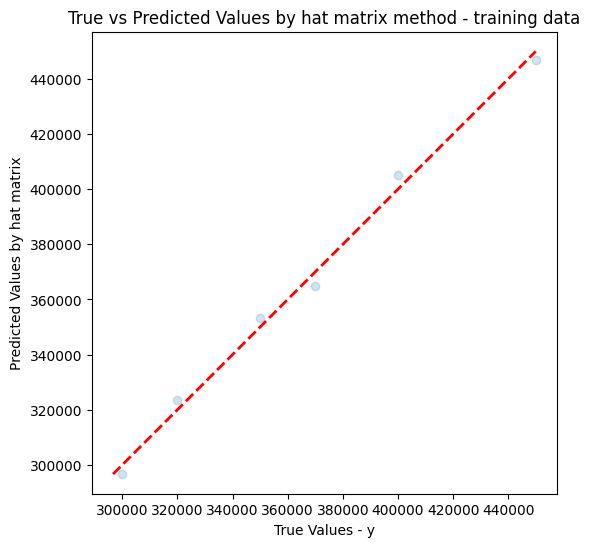

In [7]:
# Plotting the predicted values against the true values
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_hat, alpha=0.2)
plt.title('True vs Predicted Values by hat matrix method - training data')
plt.xlabel('True Values - y')
plt.ylabel('Predicted Values by hat matrix')

# Set the same boundaries for x and y axes
min_val = min(min(y_train), min(y_hat))
max_val = max(max(y_train), max(y_hat))

plt.xlim(0, max_val)
plt.ylim(0, max_val)

# Plot a 45-degree line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)


plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()


In [8]:
# compute beta
XTX_inv = np.linalg.pinv(X.T @ X)  # compute (X.T @ X) 的逆
beta = XTX_inv @ X.T @ y_train  # compute beta

print("beta:")
print(beta)


beta:
[ 86330.64515991    133.87096774  66008.0645159   51008.0645159
 -30685.48387124]


y_pred: 
[406693.54838712 351532.25806428 336774.19354854]
RMSE of hat matrix model with all features: 9910.50


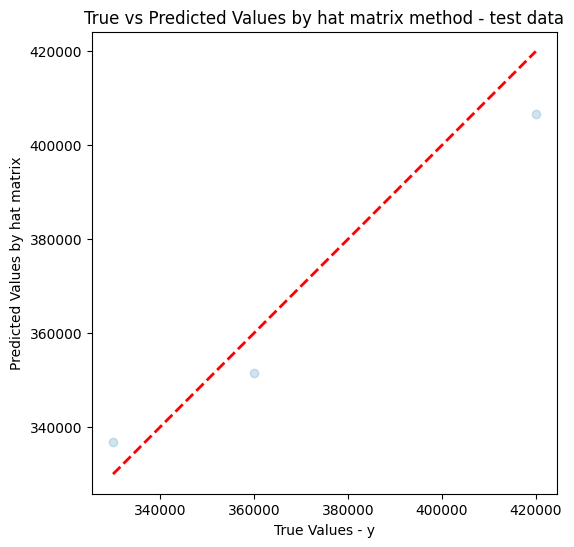

In [9]:
# compute y_pred of test data by beta
x_test_hat = x_test.to_numpy()
intercept_hat = np.ones((x_test_hat.shape[0], 1))
X_hat = np.column_stack((intercept_hat, x_test_hat))

y_hat_test = X_hat @ beta
print('y_pred: ')
print(y_hat_test)
rmse_hat = sqrt(mean_squared_error(y_test, y_hat_test))
print('RMSE of hat matrix model with all features: \
{:0.2f}'.format(rmse_hat))

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.title('True vs Predicted Values by hat matrix method - test data')
plt.xlabel('True Values - y')
plt.ylabel('Predicted Values by hat matrix')

# Set the same boundaries for x and y axes
min_val = min(min(y_test), min(y_hat_test))
max_val = max(max(y_test), max(y_hat_test))

plt.xlim(0, max_val)
plt.ylim(0, max_val)

# Plot a 45-degree line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)


plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()

In [10]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (6, 4)
y_train shape: (6,)
x_test shape: (3, 4)


y_pred: [406693.5483871  351532.25806452 336774.19354839]
RMSE of linear regression model with all features: 9910.50


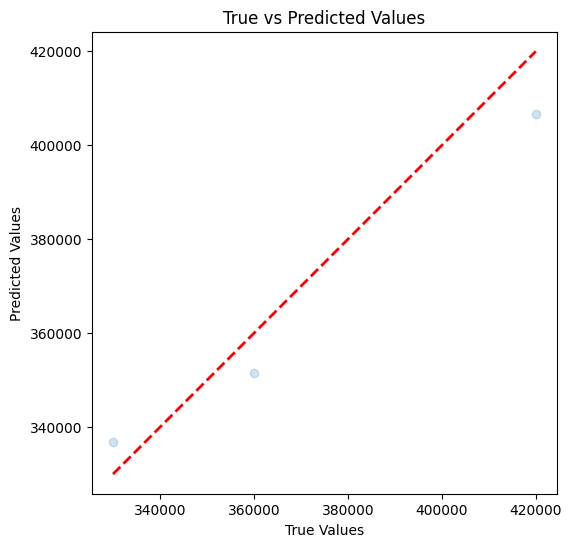

In [11]:

def train_and_predict(x_train, y_train, x_test, feat=None):
  if feat:
    x_train = x_train[feat]
    x_test = x_test[feat]

  linear_reg = LinearRegression()
  linear_reg.fit(x_train, y_train)

  y_pred = linear_reg.predict(x_test)

  print("y_pred:", y_pred)
  return y_pred


# Experiment: Linear regression model with all features
y_pred = train_and_predict(x_train, y_train, x_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print('RMSE of linear regression model with all features: \
{:0.2f}'.format(rmse))

# Plotting the predicted values against the true values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

# Set the same boundaries for x and y axes
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Plot a 45-degree line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.axis('equal')  # Ensure aspect ratio is equal
plt.show()


In [17]:
y_train_pred = train_and_predict(x_train, y_train, x_train)

print(y_hat)

y_pred: [353145.16129032 405080.64516129 296612.90322581 446854.83870968
 364919.35483871 323387.09677419]
[353145.16129    405080.6451614  296612.9032257  446854.83870996
 364919.35483856 323387.09677426]
